# Q2. Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

 - Variable Name -  Variable Description 
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No;1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
 - Name	- Name
 - Sex - Sex
 - Age - Age
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin 
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

## Import Libraries
Import all necessary libraries


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np

Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [3]:

df_train = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train.csv')  
df_test = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_test.csv')  


print("Training DataFrame:")
print(df_train.info())
print(df_train.head())

print("\nTest DataFrame:")
print(df_test.info())
print(df_test.head())

Training DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          574 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        171 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB
None
   PassengerId  Pclass                                               Name  \
0          299       1                              Saalfeld, Mr. Adolphe   
1            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmi

2. The resulting dataframe (I.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [4]:
df_train.shape


(712, 12)

3. In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [5]:
print(df_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


4. Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [6]:
missing_values = df_train.isnull().sum()

# Display columns with missing values and their count
print(missing_values[missing_values > 0])

Age         138
Cabin       541
Embarked      2
dtype: int64


5. Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [7]:
# Drop the specified columns from df_train
df_train = df_train.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

6. Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the ‘dropna()’ function to drop any remaining rows that consist of NA values.

In [8]:
# Fill missing values in the 'Age' column with the mean value of 'Age'
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

# Drop any remaining rows with NA values
df_train = df_train.dropna()

7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [9]:
# Create X_train (features) and y_train (target) from df_train
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

# Split df_test into X_test (features) and y_test (target)
X_test = df_test.drop(columns=['Survived'])
y_test = df_test['Survived']


#### ii. Data Visualization

1. Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title.

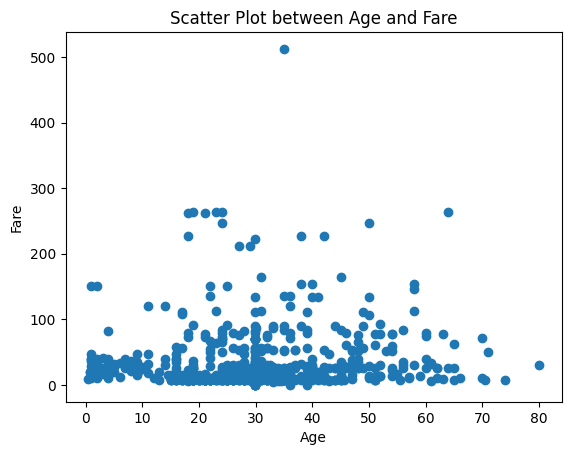

In [10]:
# Scatter plot between 'Age' and 'Fare' columns
plt.scatter(df_train['Age'], df_train['Fare'])

# Labeling the axes and giving the plot a title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot between Age and Fare')

# Show the plot
plt.show()


2. **Only for this question** use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column). 

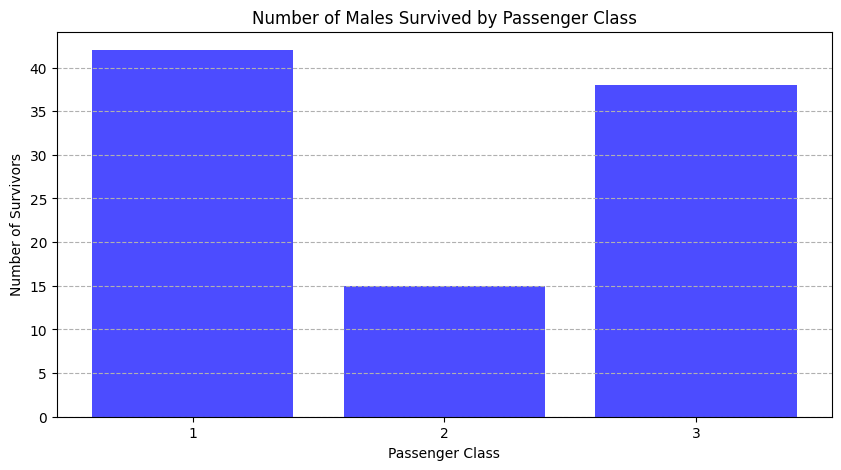

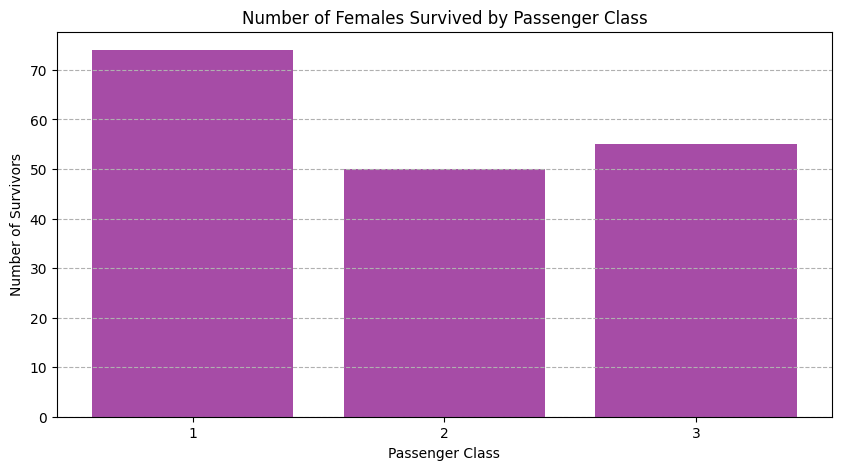

In [11]:
# Filter df_train for male and female passengers who survived
males_survived = df_train[df_train['Sex'] == 'male'].groupby('Pclass')['Survived'].sum()
females_survived = df_train[df_train['Sex'] == 'female'].groupby('Pclass')['Survived'].sum()

# Bar chart for males who survived
plt.figure(figsize=(10, 5))
plt.bar(males_survived.index, males_survived.values, color='blue', alpha=0.7)
plt.title('Number of Males Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.xticks(males_survived.index)
plt.grid(axis='y', linestyle='--')
plt.show()

# Bar chart for females who survived
plt.figure(figsize=(10, 5))
plt.bar(females_survived.index, females_survived.values, color='purple', alpha=0.7)
plt.title('Number of Females Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.xticks(females_survived.index)
plt.grid(axis='y', linestyle='--')
plt.show()


3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

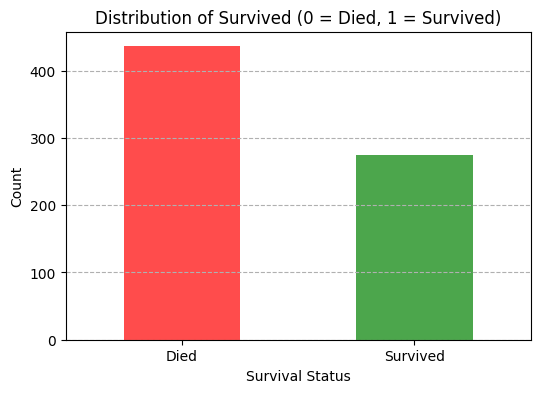

In [12]:
# Plotting the distribution of the 'Survived' column in y_train
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Distribution of Survived (0 = Died, 1 = Survived)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Died', 'Survived'], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


4. So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train store the result back into X_train). 

In [13]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,29.811847,0,0,30.5000,True,False,True
1,3,27.000000,0,2,11.1333,False,False,True
2,2,29.811847,0,0,0.0000,True,False,True
3,3,9.000000,4,2,31.2750,False,False,True
4,1,48.000000,1,0,39.6000,False,False,False


In [14]:
# a. Highest and Lowest Fare Prices
highest_fare = df_train['Fare'].max()
lowest_fare = df_train['Fare'].min()

# b. Mean values of Age and Fare
mean_age = df_train['Age'].mean()
mean_fare = df_train['Fare'].mean()

# c. Age of the oldest passenger
oldest_age = df_train['Age'].max()

print(f"Highest Fare: {highest_fare}")
print(f"Lowest Fare: {lowest_fare}")
print(f"Mean Age: {mean_age}")
print(f"Mean Fare: {mean_fare}")
print(f"Age of the Oldest Passenger: {oldest_age}")


# a. Least number of survived males and females by class
least_survived_males_class = males_survived.idxmin()
least_survived_males_count = males_survived.min()
least_survived_females_class = females_survived.idxmin()
least_survived_females_count = females_survived.min()

# b. Greatest number of survived males and females by class
greatest_survived_males_class = males_survived.idxmax()
greatest_survived_males_count = males_survived.max()
greatest_survived_females_class = females_survived.idxmax()
greatest_survived_females_count = females_survived.max()

print(f"Least Survived Males: Class {least_survived_males_class}, Count: {least_survived_males_count}")
print(f"Least Survived Females: Class {least_survived_females_class}, Count: {least_survived_females_count}")
print(f"Greatest Survived Males: Class {greatest_survived_males_class}, Count: {greatest_survived_males_count}")
print(f"Greatest Survived Females: Class {greatest_survived_females_class}, Count: {greatest_survived_females_count}")

# Initial comment on distribution
survival_distribution = y_train.value_counts()
print(f"Survival Distribution: {survival_distribution}")

print(f"New shape of X_train after converting categorical variables: {X_train.shape}")


Highest Fare: 512.3292
Lowest Fare: 0.0
Mean Age: 29.75497865240222
Mean Fare: 32.52509295774648
Age of the Oldest Passenger: 80.0
Least Survived Males: Class 2, Count: 15
Least Survived Females: Class 2, Count: 50
Greatest Survived Males: Class 1, Count: 42
Greatest Survived Females: Class 1, Count: 74
Survival Distribution: Survived
0    436
1    274
Name: count, dtype: int64
New shape of X_train after converting categorical variables: (710, 8)


#### iii. Data Scaling

1. Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again. 

In [15]:
continuous_columns = ['Age', 'Fare']
scaler = MinMaxScaler()
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
print(X_train.head())


   Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
0       1  0.369337      0      0  0.059532      True       False        True
1       3  0.334004      0      2  0.021731     False       False        True
2       2  0.369337      0      0  0.000000      True       False        True
3       3  0.107816      4      2  0.061045     False       False        True
4       1  0.597889      1      0  0.077294     False       False       False


2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [16]:
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])
print(X_test.head())

   Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
0       2  0.623021      0      1  0.050749         0           0           1
1       1  0.547625      0      0  0.054107         0           0           0
2       3  0.362113      0      0  0.015379         0           1           0
3       3  0.057552      0      0  0.024350         0           0           1
4       2  0.258608      0      0  0.143462         1           0           1


### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [17]:
model_lr = LogisticRegression()
print(model_lr)

LogisticRegression()


2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [18]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [19]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [20]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression model:", accuracy_lr)

Accuracy of Logistic Regression model: 0.8938547486033519


#### ii. Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1. Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Make sure to set `probability=True` when creating the model. Label this model as ‘model_svm’

In [21]:
model_svm = SVC(probability=True)
print(model_svm)

SVC(probability=True)


2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [22]:
model_svm.fit(X_train, y_train)

SVC(probability=True)

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [23]:
y_pred_svm = model_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [24]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression model: {accuracy_lr}")


Accuracy of Logistic Regression model: 0.8938547486033519


#### iii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

In [25]:
# For Noise 20%
df_train_noise20 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise20.csv')
X_train_20 = df_train_noise20.drop(columns='Survived')
y_train_20 = df_train_noise20['Survived']

# Instantiate the Logistic Regression model for noise 20%
model_lr_noise_20 = LogisticRegression()

# Fit the model
model_lr_noise_20.fit(X_train_20, y_train_20)

# Predict using the model
y_pred_lr_noise_20 = model_lr_noise_20.predict(X_test)

# Calculate and print the accuracy for noise 20%
accuracy_lr_noise_20 = accuracy_score(y_test, y_pred_lr_noise_20)
print(f"Accuracy of Logistic Regression model with 20% noise: {accuracy_lr_noise_20}")

# For Noise 40%
df_train_noise40 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise40.csv')
X_train_40 = df_train_noise40.drop(columns='Survived')
y_train_40 = df_train_noise40['Survived']

# Instantiate the Logistic Regression model for noise 40%
model_lr_noise_40 = LogisticRegression()

# Fit the model
model_lr_noise_40.fit(X_train_40, y_train_40)

# Predict using the model
y_pred_lr_noise_40 = model_lr_noise_40.predict(X_test)

# Calculate and print the accuracy for noise 40%
accuracy_lr_noise_40 = accuracy_score(y_test, y_pred_lr_noise_40)
print(f"Accuracy of Logistic Regression model with 40% noise: {accuracy_lr_noise_40}")

# For Noise 60%
df_train_noise60 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise60.csv')
X_train_60 = df_train_noise60.drop(columns='Survived')
y_train_60 = df_train_noise60['Survived']

# Instantiate the Logistic Regression model for noise 60%
model_lr_noise_60 = LogisticRegression()

# Fit the model
model_lr_noise_60.fit(X_train_60, y_train_60)

# Predict using the model
y_pred_lr_noise_60 = model_lr_noise_60.predict(X_test)

# Calculate and print the accuracy for noise 60%
accuracy_lr_noise_60 = accuracy_score(y_test, y_pred_lr_noise_60)
print(f"Accuracy of Logistic Regression model with 60% noise: {accuracy_lr_noise_60}")


Accuracy of Logistic Regression model with 20% noise: 0.6703910614525139
Accuracy of Logistic Regression model with 40% noise: 0.6480446927374302
Accuracy of Logistic Regression model with 60% noise: 0.37988826815642457


#### iv. Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).  

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20`’ we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable. 
     
**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.**
Train a new SVM classification model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_svm_noise_<nl>`.  Specifically, do the following:
1. Employ a new SVM classifier from sklearn and instantiate the model. Label this model as `model_svm_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data. 
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_svm_noise<nl>`.  
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model. 

In [26]:
# For Noise 20%
df_train_noise20 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise20.csv')
X_train_20 = df_train_noise20.drop(columns='Survived')
y_train_20 = df_train_noise20['Survived']

# Instantiate the SVM classifier for noise 20%
model_svm_noise_20 = SVC(probability=True)

# Fit the model
model_svm_noise_20.fit(X_train_20, y_train_20)

# Predict using the model
y_pred_svm_noise_20 = model_svm_noise_20.predict(X_test)

# Calculate and print the accuracy for noise 20%
accuracy_svm_noise_20 = accuracy_score(y_test, y_pred_svm_noise_20)
print(f"Accuracy of SVM model with 20% noise: {accuracy_svm_noise_20}")

# For Noise 40%
df_train_noise40 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise40.csv')
X_train_40 = df_train_noise40.drop(columns='Survived')
y_train_40 = df_train_noise40['Survived']

# Instantiate the SVM classifier for noise 40%
model_svm_noise_40 = SVC(probability=True)

# Fit the model
model_svm_noise_40.fit(X_train_40, y_train_40)

# Predict using the model
y_pred_svm_noise_40 = model_svm_noise_40.predict(X_test)

# Calculate and print the accuracy for noise 40%
accuracy_svm_noise_40 = accuracy_score(y_test, y_pred_svm_noise_40)
print(f"Accuracy of SVM model with 40% noise: {accuracy_svm_noise_40}")

# For Noise 60%
df_train_noise60 = pd.read_csv('D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise60.csv')
X_train_60 = df_train_noise60.drop(columns='Survived')
y_train_60 = df_train_noise60['Survived']

# Instantiate the SVM classifier for noise 60%
model_svm_noise_60 = SVC(probability=True)

# Fit the model
model_svm_noise_60.fit(X_train_60, y_train_60)

# Predict using the model
y_pred_svm_noise_60 = model_svm_noise_60.predict(X_test)

# Calculate and print the accuracy for noise 60%
accuracy_svm_noise_60 = accuracy_score(y_test, y_pred_svm_noise_60)
print(f"Accuracy of SVM model with 60% noise: {accuracy_svm_noise_60}")


Accuracy of SVM model with 20% noise: 0.664804469273743
Accuracy of SVM model with 40% noise: 0.6312849162011173
Accuracy of SVM model with 60% noise: 0.7206703910614525


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the `model_lr` model and the `model_svm` along with a confusion matrix for each of them. 

In [27]:
# For Logistic Regression model (model_lr)
y_pred_lr = model_lr.predict(X_test)  # Predictions for Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))  # Precision, Recall, F1 Score for each class
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))  # Confusion matrix for Logistic Regression

# For SVM model (model_svm)
y_pred_svm = model_svm.predict(X_test)  # Predictions for SVM model
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))  # Precision, Recall, F1 Score for each class
print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))  # Confusion matrix for SVM


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       113
           1       0.89      0.82      0.85        66

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179

Logistic Regression Confusion Matrix:
[[106   7]
 [ 12  54]]

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       113
           1       0.91      0.79      0.85        66

    accuracy                           0.89       179
   macro avg       0.90      0.87      0.88       179
weighted avg       0.90      0.89      0.89       179

Support Vector Machine Confusion Matrix:
[[108   5]
 [ 14  52]]


#### ii. Report the accuracy and classification report for each of the three noisy models (`model_lr_noise<nl>`, `model_svm_noise<nl>`). 

In [28]:
noise_files = {
  "20": "D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise20.csv",
    "40": "D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise40.csv",
    "60": "D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q2\df_train_noise60.csv"
}


for nl, file_path in noise_files.items():
    df_train_noise = pd.read_csv(file_path)
    
    X_train_noise = df_train_noise.drop(columns=['Survived'], errors='ignore')
    y_train_noise = df_train_noise['Survived']
    
    model_lr_noise = LogisticRegression(random_state=42)
    model_lr_noise.fit(X_train_noise, y_train_noise)
    y_pred_lr_noise = model_lr_noise.predict(X_test)
    print(f"\nLogistic Regression Model with {nl}% Noise:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_noise):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_lr_noise))
    
    model_svm_noise = SVC(probability=True, random_state=42)
    model_svm_noise.fit(X_train_noise, y_train_noise)
    y_pred_svm_noise = model_svm_noise.predict(X_test)
    print(f"\nSVM Model with {nl}% Noise:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_noise):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_svm_noise))



Logistic Regression Model with 20% Noise:
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       113
           1       1.00      0.11      0.19        66

    accuracy                           0.67       179
   macro avg       0.83      0.55      0.49       179
weighted avg       0.78      0.67      0.57       179


SVM Model with 20% Noise:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       113
           1       1.00      0.09      0.17        66

    accuracy                           0.66       179
   macro avg       0.83      0.55      0.48       179
weighted avg       0.78      0.66      0.56       179


Logistic Regression Model with 40% Noise:
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       113
          

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### iii. Make a calibration plot for each of the models without noisy data (`model_lr`, `model_svm`).

Use the CalibrationDisplay class from sklearn.calibration to make your plot.

<Figure size 1000x600 with 0 Axes>

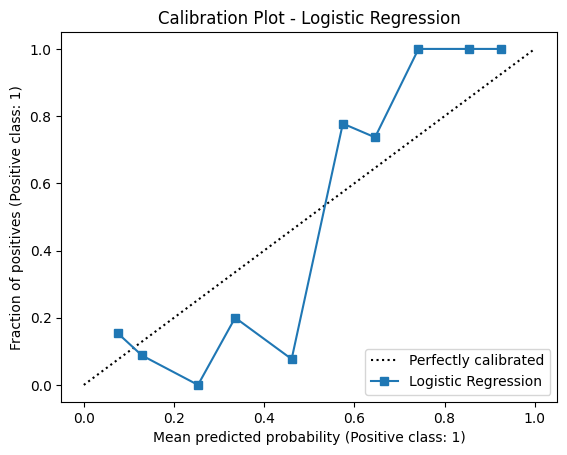

<Figure size 1000x600 with 0 Axes>

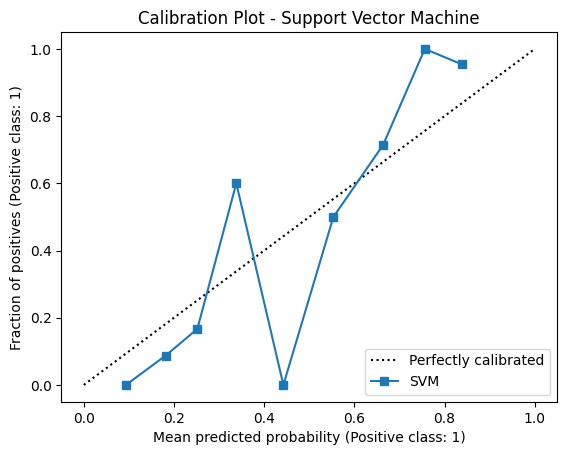

In [29]:
plt.figure(figsize=(10, 6))
CalibrationDisplay.from_estimator(model_lr, X_test, y_test, n_bins=10, name="Logistic Regression")
plt.title("Calibration Plot - Logistic Regression")
plt.show()

plt.figure(figsize=(10, 6))
CalibrationDisplay.from_estimator(model_svm, X_test, y_test, n_bins=10, name="SVM")
plt.title("Calibration Plot - Support Vector Machine")
plt.show()